In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

DATA_PATH = "/Users/jessbreda/Desktop/github/animal-learning/data/cleaned/all_animals_cleaned.csv"

# Google Slides [Summary](https://docs.google.com/presentation/d/14S5fzwGBbEL5Xq8j_KZY8SFUo-GPykkT6KsXEPrsZYw/edit#slide=id.p) of Results 


# Read in

In [2]:
df = pd.read_csv(DATA_PATH)

In [3]:
n_animals = df["animal_id"].nunique()

## Raw Data of delay over trials for each animal

In [4]:
df.columns

Index(['animal_id', 'session_date', 'session_file_counter', 'rig_id',
       'training_stage', 's_a', 's_b', 'hit', 'violation', 'trial_not_started',
       's_a_sigma', 'rule', 'correct_side', 'violation_penalty_time',
       'error_penalty_time', 'delayed_reward_time', 'pre_stim_time',
       's_a_time', 'delay_time', 's_b_time', 'post_s_b_to_go_cue_time',
       'go_cue_time', 'fixation_time', 'trial_start_wait_time', 'l_water_vol',
       'r_water_vol', 'antibias_beta', 'antibias_right_prob',
       'using_psychometric_pairs', 'choice', 'session',
       'session_relative_to_old', 'n_prev_trial_not_started', 'trial'],
      dtype='object')

[Text(0, 0.5, 'Delay Time'),
 Text(0.5, 0, 'Trial'),
 Text(0.5, 1.0, 'First 10 sessions for W078')]

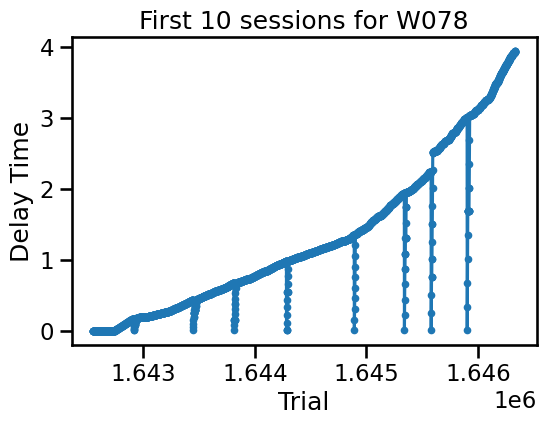

In [5]:
single_animal = "W078"
subdf = df.query("animal_id == @single_animal and session < 10")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(subdf.delay_time, marker=".")

ax.set(
    ylabel="Delay Time", xlabel="Trial", title=f"First 10 sessions for {single_animal}"
)

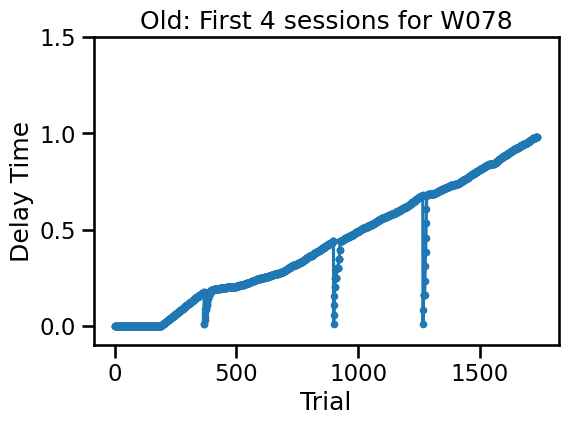

In [238]:
single_animal = "W078"
subdf = df.query("animal_id == @single_animal and session < 5")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(subdf.delay_time.reset_index(), marker=".", color="tab:blue")

_ = ax.set(
    ylabel="Delay Time",
    xlabel="Trial",
    title=f"Old: First 4 sessions for {single_animal}",
    ylim=(-0.1, 1.5),
)

[Text(0, 0.5, 'Delay Time'),
 Text(0.5, 0, 'Trial'),
 Text(0.5, 1.0, 'Sesion 10 for W078')]

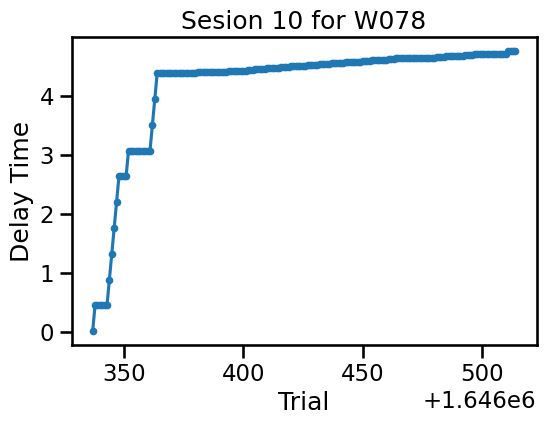

In [9]:
single_animal = "W078"
subdf = df.query("animal_id == @single_animal and session == 10")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(subdf.delay_time, marker=".")

ax.set(ylabel="Delay Time", xlabel="Trial", title=f"Sesion 10 for {single_animal}")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Delta Del Time [s]'),
 Text(0.5, 1.0, 'Sesion 10 for W078')]

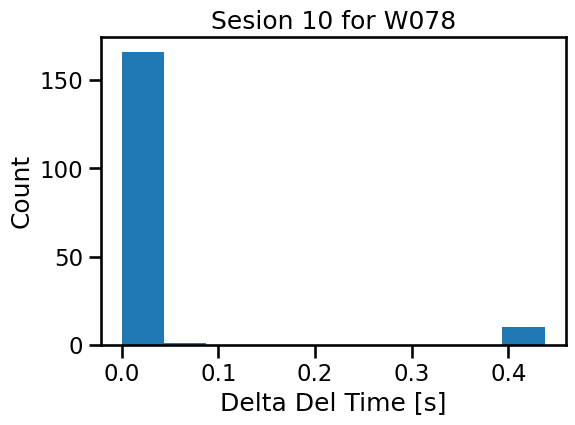

In [12]:
single_animal = "W078"
subdf = df.query("animal_id == @single_animal and session == 10")
fig, ax = plt.subplots(figsize=(6, 4))


ax.hist(subdf.delay_time.diff())
ax.set(
    ylabel="Count", xlabel="Delta Del Time [s]", title=f"Sesion 10 for {single_animal}"
)

## All delay times over trials in stage 1

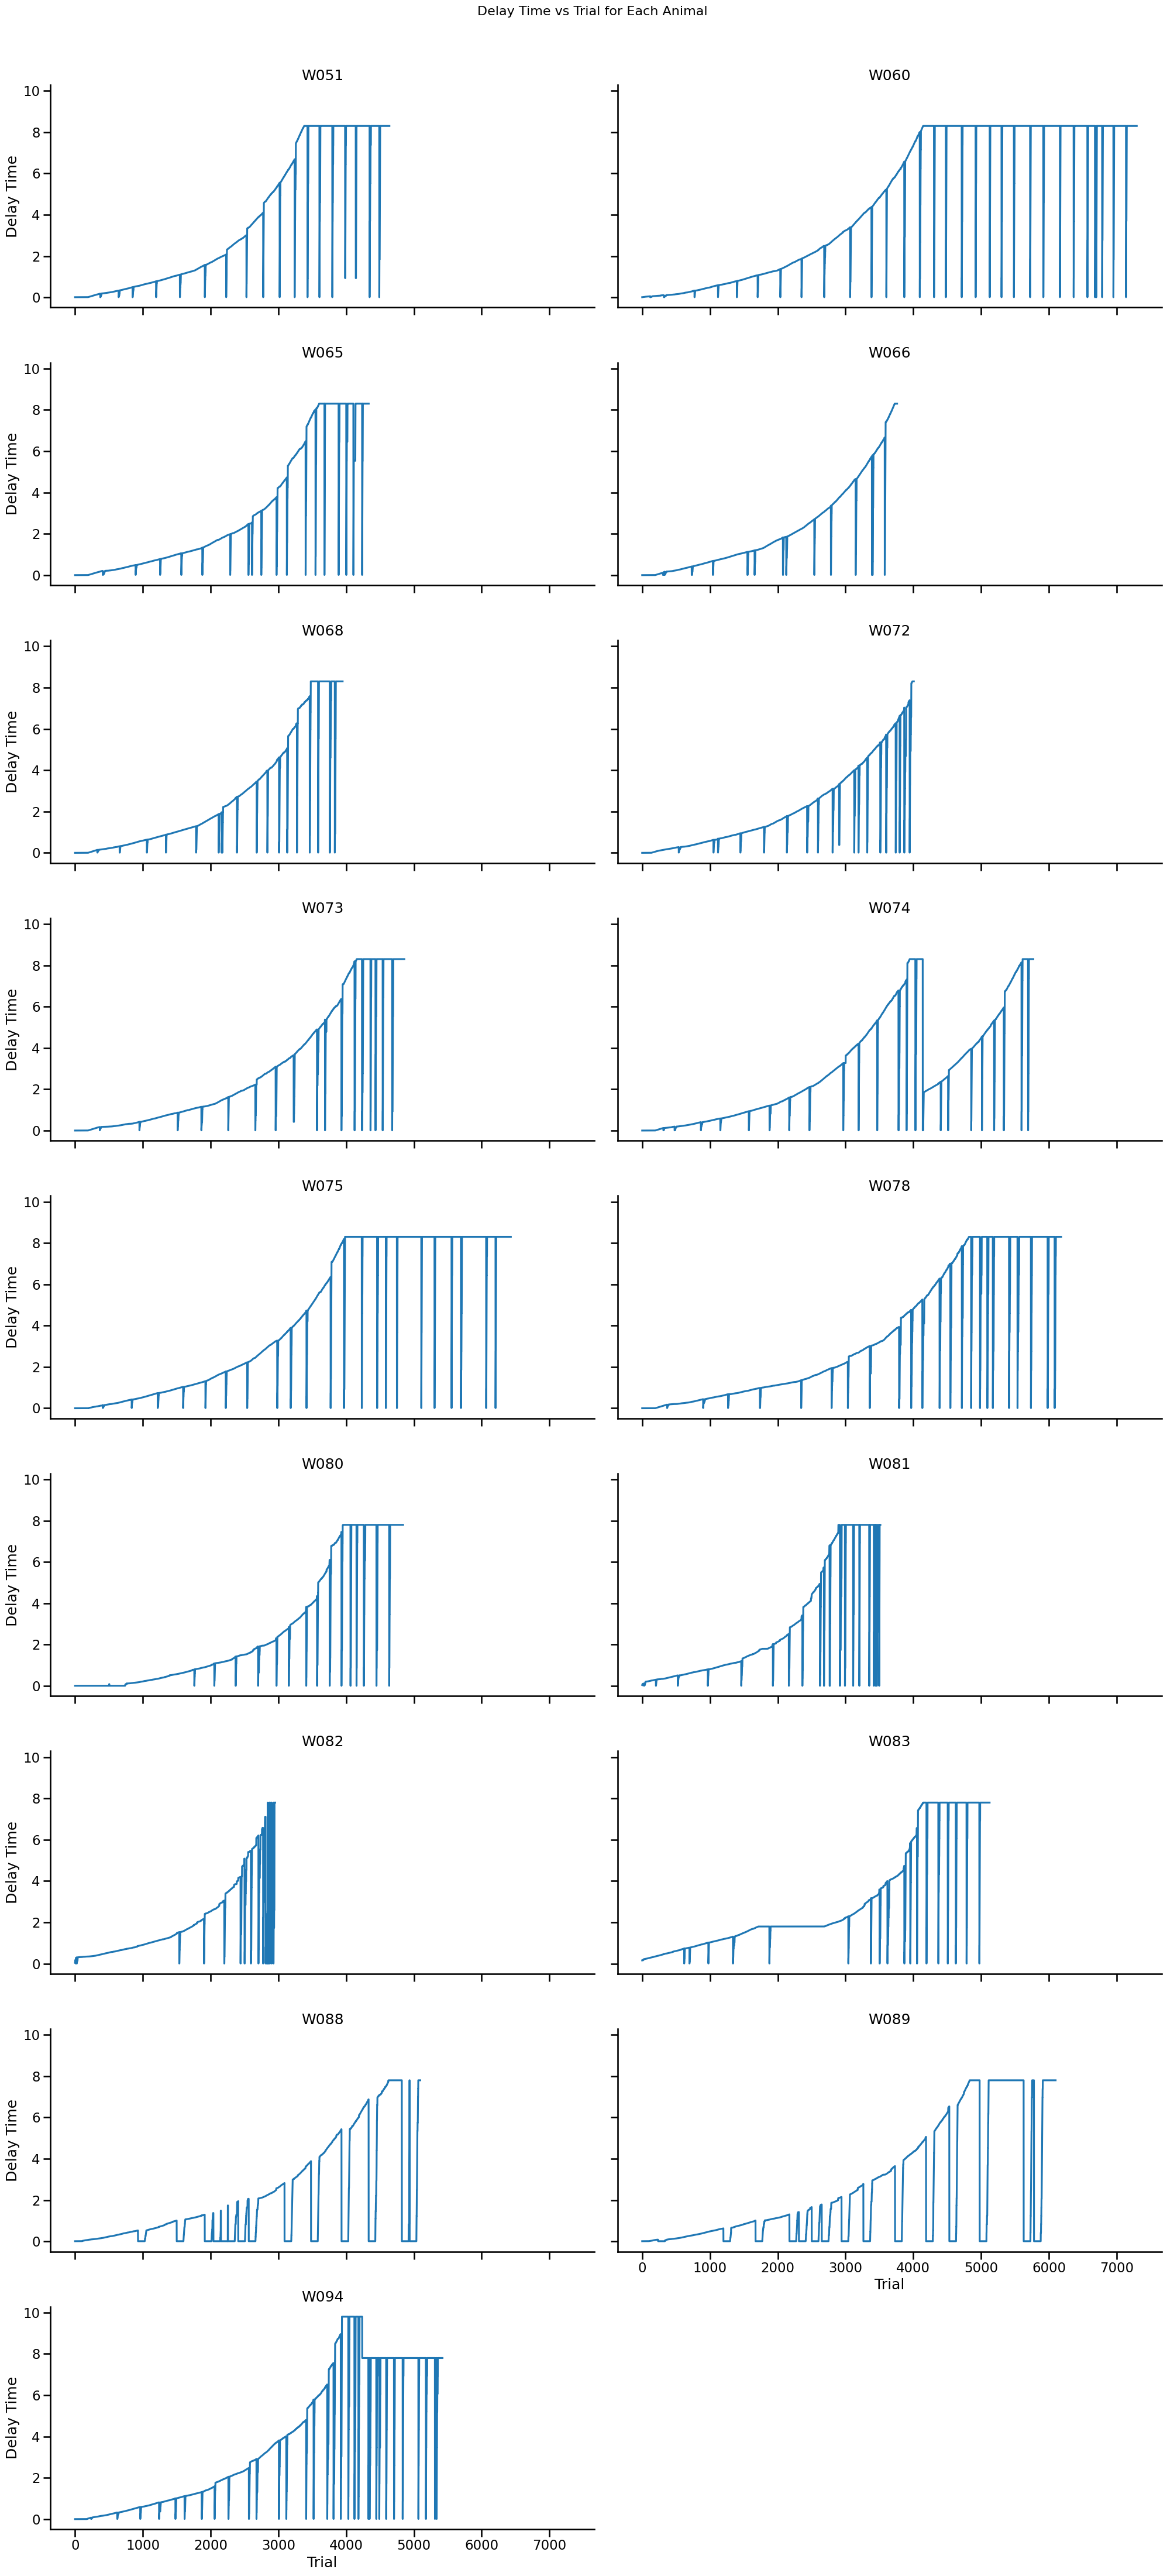

In [13]:
def matplolib_plot(y, **kwargs):
    x = np.arange(len(y))
    plt.plot(x, y, **kwargs)


# Create a FacetGrid with 2 columns
g = sns.FacetGrid(
    df.query("training_stage == 1"), col="animal_id", col_wrap=2, height=5, aspect=2
)

# Map the lineplot function to each subset of the data
g.map(matplolib_plot, "delay_time")

# Add titles and adjust layout if needed
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Delay Time vs Trial for Each Animal", fontsize=16)
g.set_axis_labels("Trial", "Delay Time")

## Repeat but for sessions with delay times less than 1.4 seconds

Chose 1.4 seconds to be compatible with DMS protocol

In [18]:
def filter_sessions_up_to_threshold(df, threshold):
    """
    Filters the DataFrame to include all sessions for each
    animal leading up to (and including) the first session
    where the maximum delay_time is above the given threshold.

    Parameters:
    df (pd.DataFrame):
        DataFrame containing columns 'animal_id',
        'session_id', 'trial', and 'delay_time'.
    threshold (float):
        The threshold above which we stop including
          sessions.

    Returns:
    pd.DataFrame:
        A filtered DataFrame containing sessions
        leading up to (and including) the first session
        where the maximum delay_time is above the
        threshold for each animal.
    """
    # Step 1: Group by animal_id and session_id, and calculate the maximum delay_time for each session
    max_delay_time_per_session = (
        df.groupby(["animal_id", "session"])["delay_time"].max().reset_index()
    )

    dfs = []

    # Step 2: Iterate over each animal_id
    for animal_id, group in max_delay_time_per_session.groupby("animal_id"):
        # Step 3: Find the first session where the maximum delay_time is above the threshold
        above_threshold_session = group[group["delay_time"] > threshold]
        if not above_threshold_session.empty:
            first_above_threshold_session = above_threshold_session.iloc[0]["session"]

            print(
                f"animal_id = {animal_id}, above threshold session = {first_above_threshold_session}"
            )

            # Step 4: Grab all sessions to threshold and append
            dfs.append(
                df.query(
                    "animal_id == @animal_id and session <= @first_above_threshold_session"
                )
            )

    # Step 5: Filter the original DataFrame to include only the rows from the sessions to keep
    filtered_df = pd.concat(dfs, ignore_index=True)

    return filtered_df

In [19]:
threshold = 1.4
short_del_df = filter_sessions_up_to_threshold(df, threshold=threshold)

animal_id = W051, above threshold session = 6
animal_id = W060, above threshold session = 8
animal_id = W065, above threshold session = 6
animal_id = W066, above threshold session = 9
animal_id = W068, above threshold session = 6
animal_id = W072, above threshold session = 9
animal_id = W073, above threshold session = 6
animal_id = W074, above threshold session = 7
animal_id = W075, above threshold session = 7
animal_id = W078, above threshold session = 6
animal_id = W080, above threshold session = 6
animal_id = W081, above threshold session = 6
animal_id = W082, above threshold session = 7
animal_id = W083, above threshold session = 5
animal_id = W088, above threshold session = 5
animal_id = W089, above threshold session = 4
animal_id = W094, above threshold session = 9


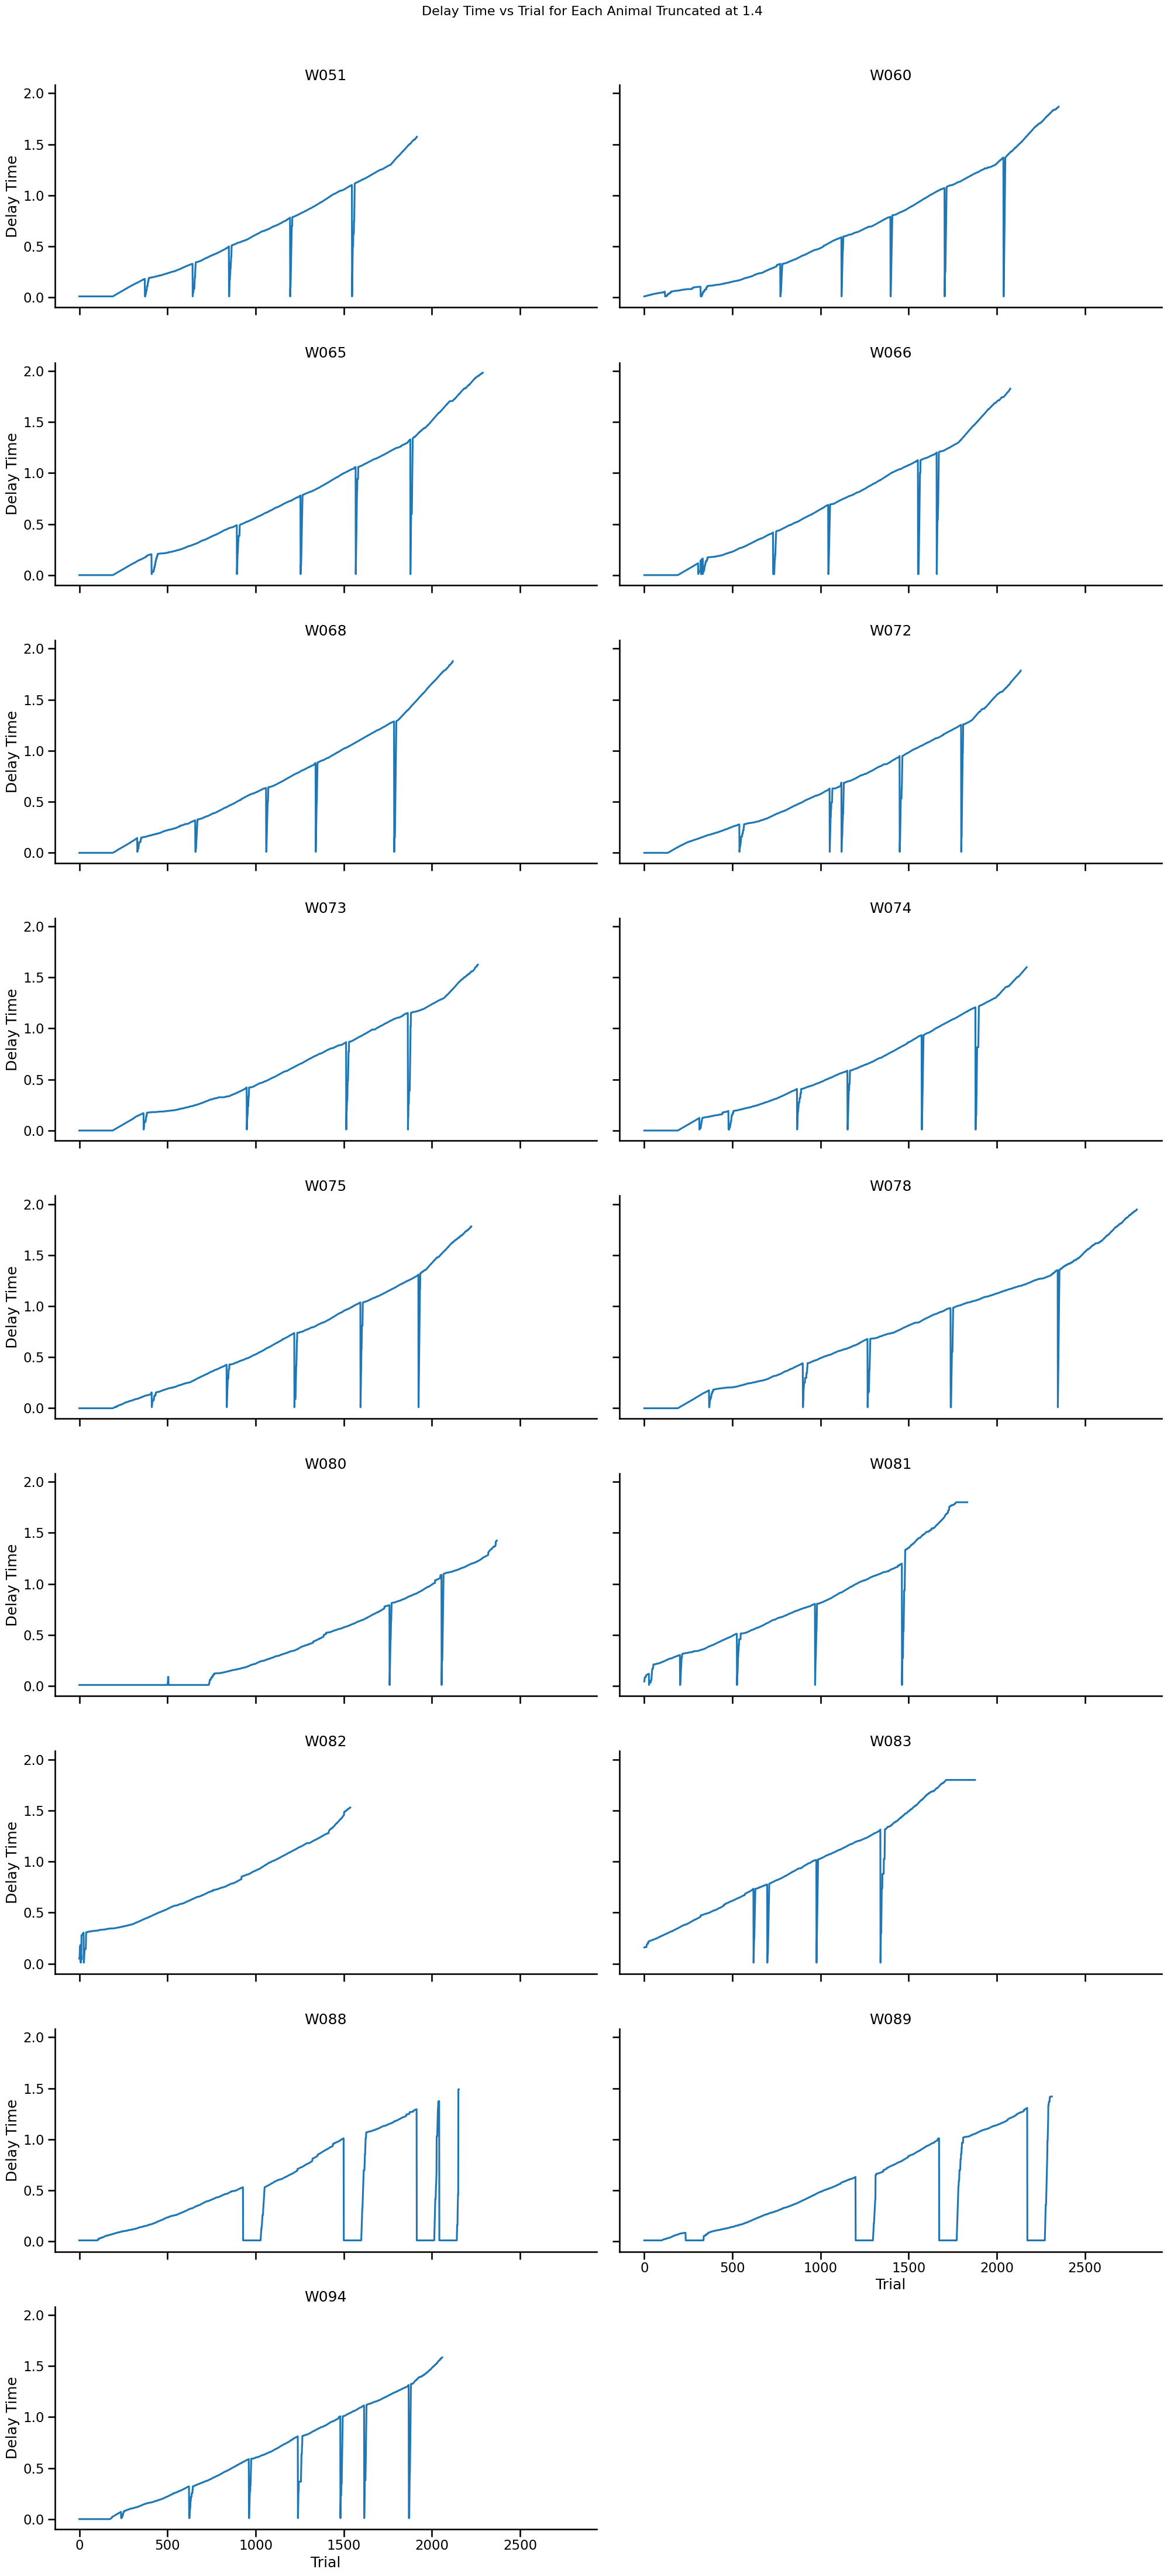

In [20]:
# Create a FacetGrid with 2 columns
g = sns.FacetGrid(
    short_del_df.query("training_stage == 1"),
    col="animal_id",
    col_wrap=2,
    height=5,
    aspect=2,
)

# Map the lineplot function to each subset of the data
g.map(matplolib_plot, "delay_time")

# Add titles and adjust layout if needed
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle(
    f"Delay Time vs Trial for Each Animal Truncated at {threshold}", fontsize=16
)
g.set_axis_labels("Trial", "Delay Time")

## Session by Delay Time (threshold at 1.4)



/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_55878/1913002043.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks())


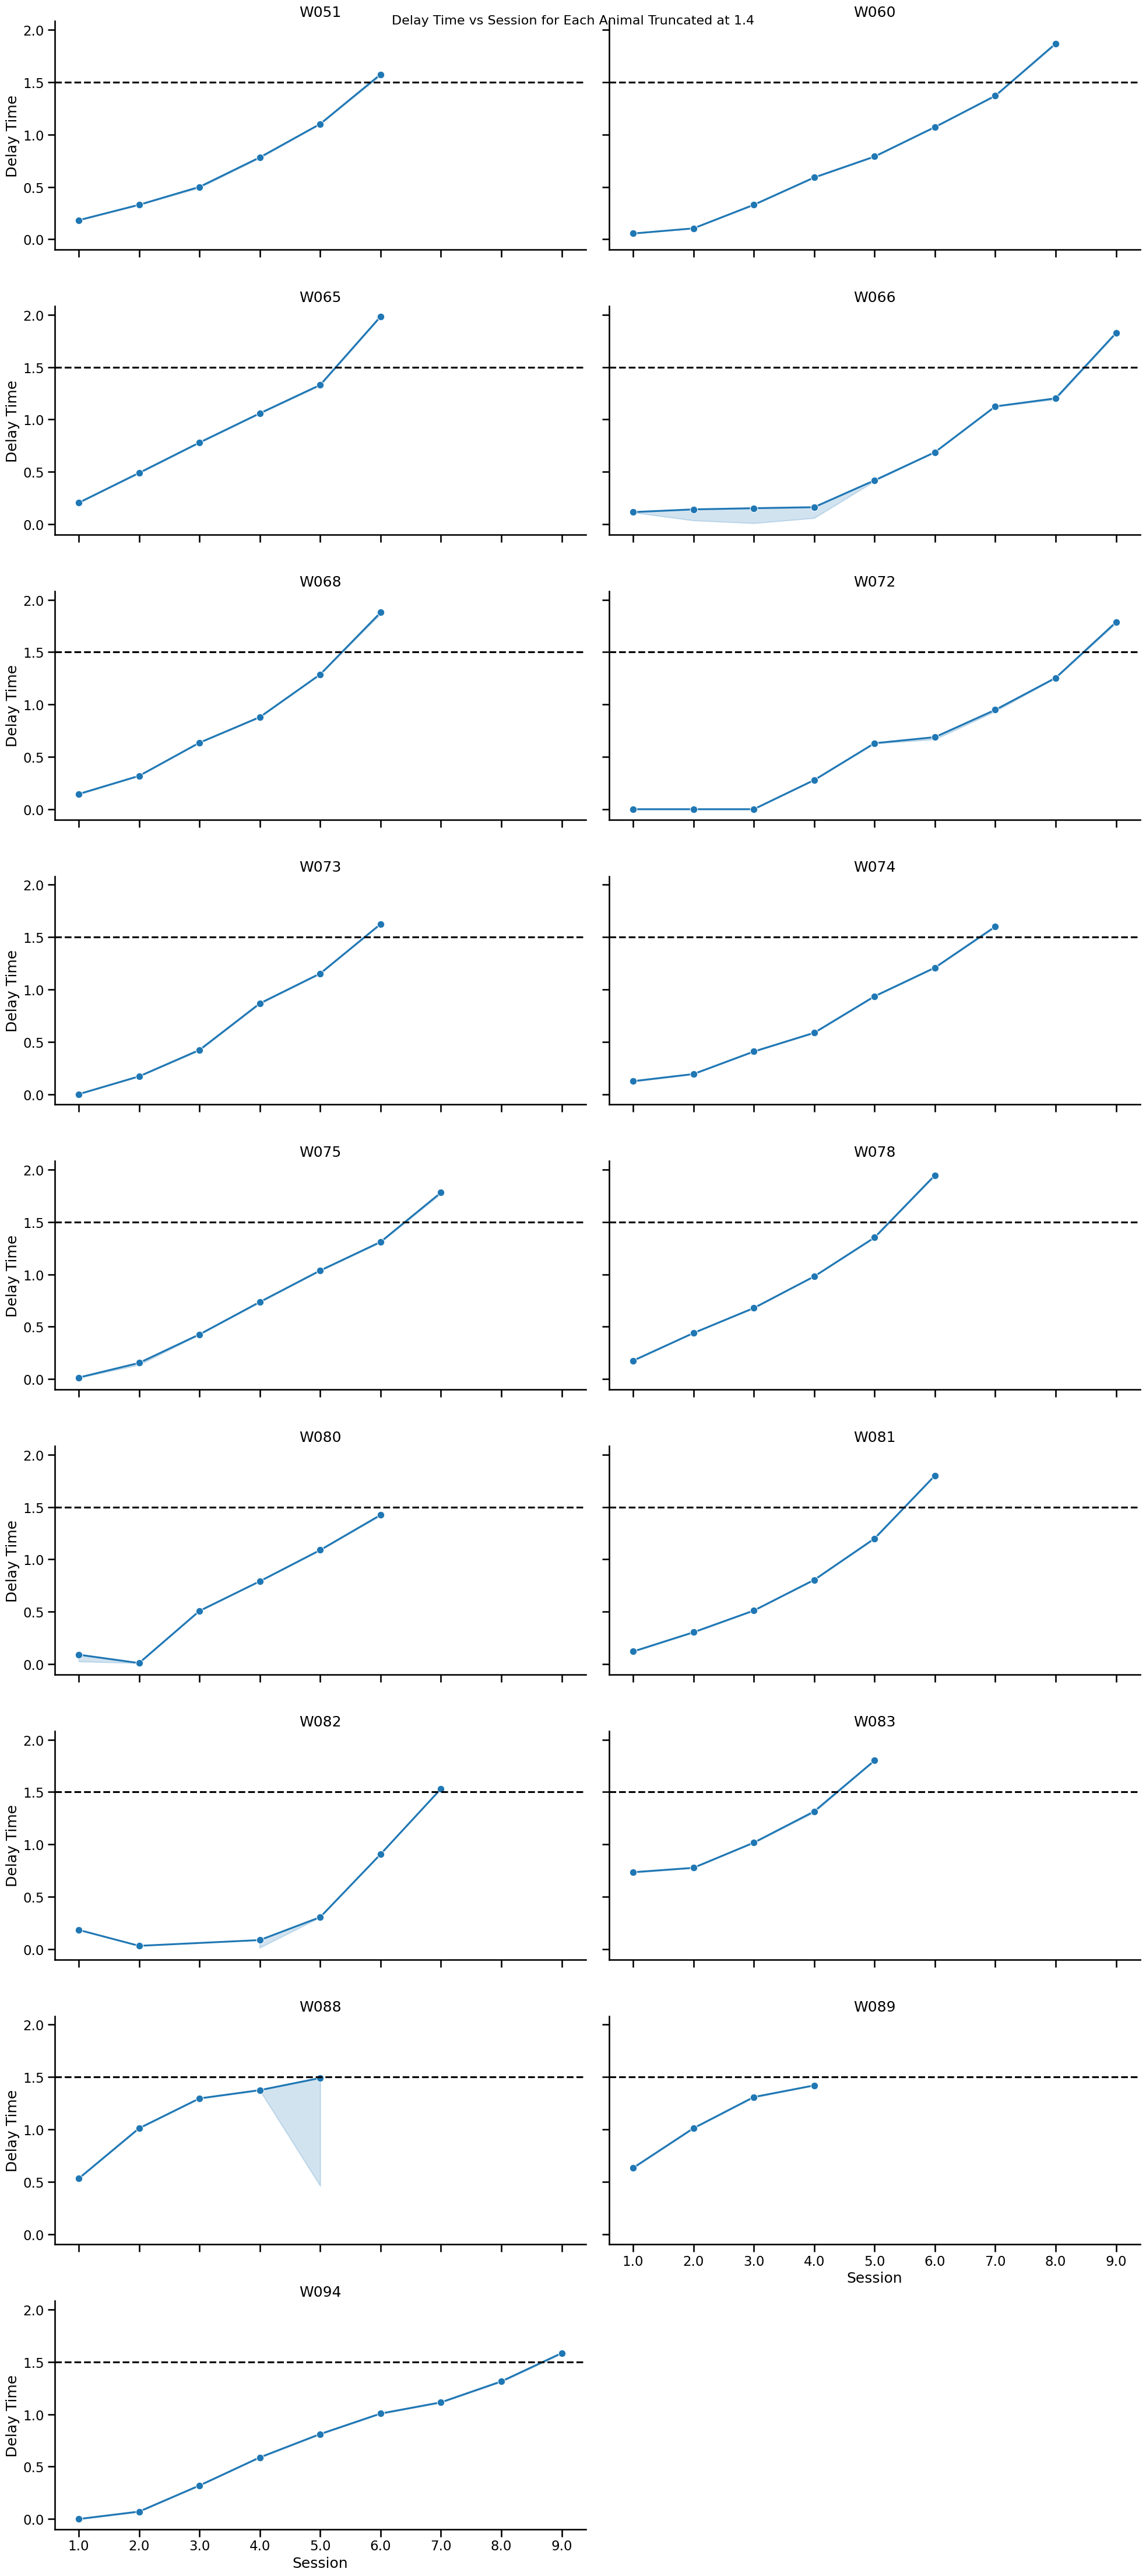

In [21]:
# Create a FacetGrid with 2 columns
g = sns.FacetGrid(
    short_del_df.query("training_stage == 1"),
    col="animal_id",
    col_wrap=2,
    height=5,
    aspect=2,
)

# Map the lineplot function to each subset of the data
g.map(sns.lineplot, "session", "delay_time", marker="o", estimator="max")

# Add titles and adjust layout if needed
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle(
    f"Delay Time vs Session for Each Animal Truncated at {threshold}", fontsize=16
)
g.set_axis_labels("Session", "Delay Time")

g.map(plt.axhline, y=1.5, color="k", linestyle="--")
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticks())

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_55878/263458032.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks())


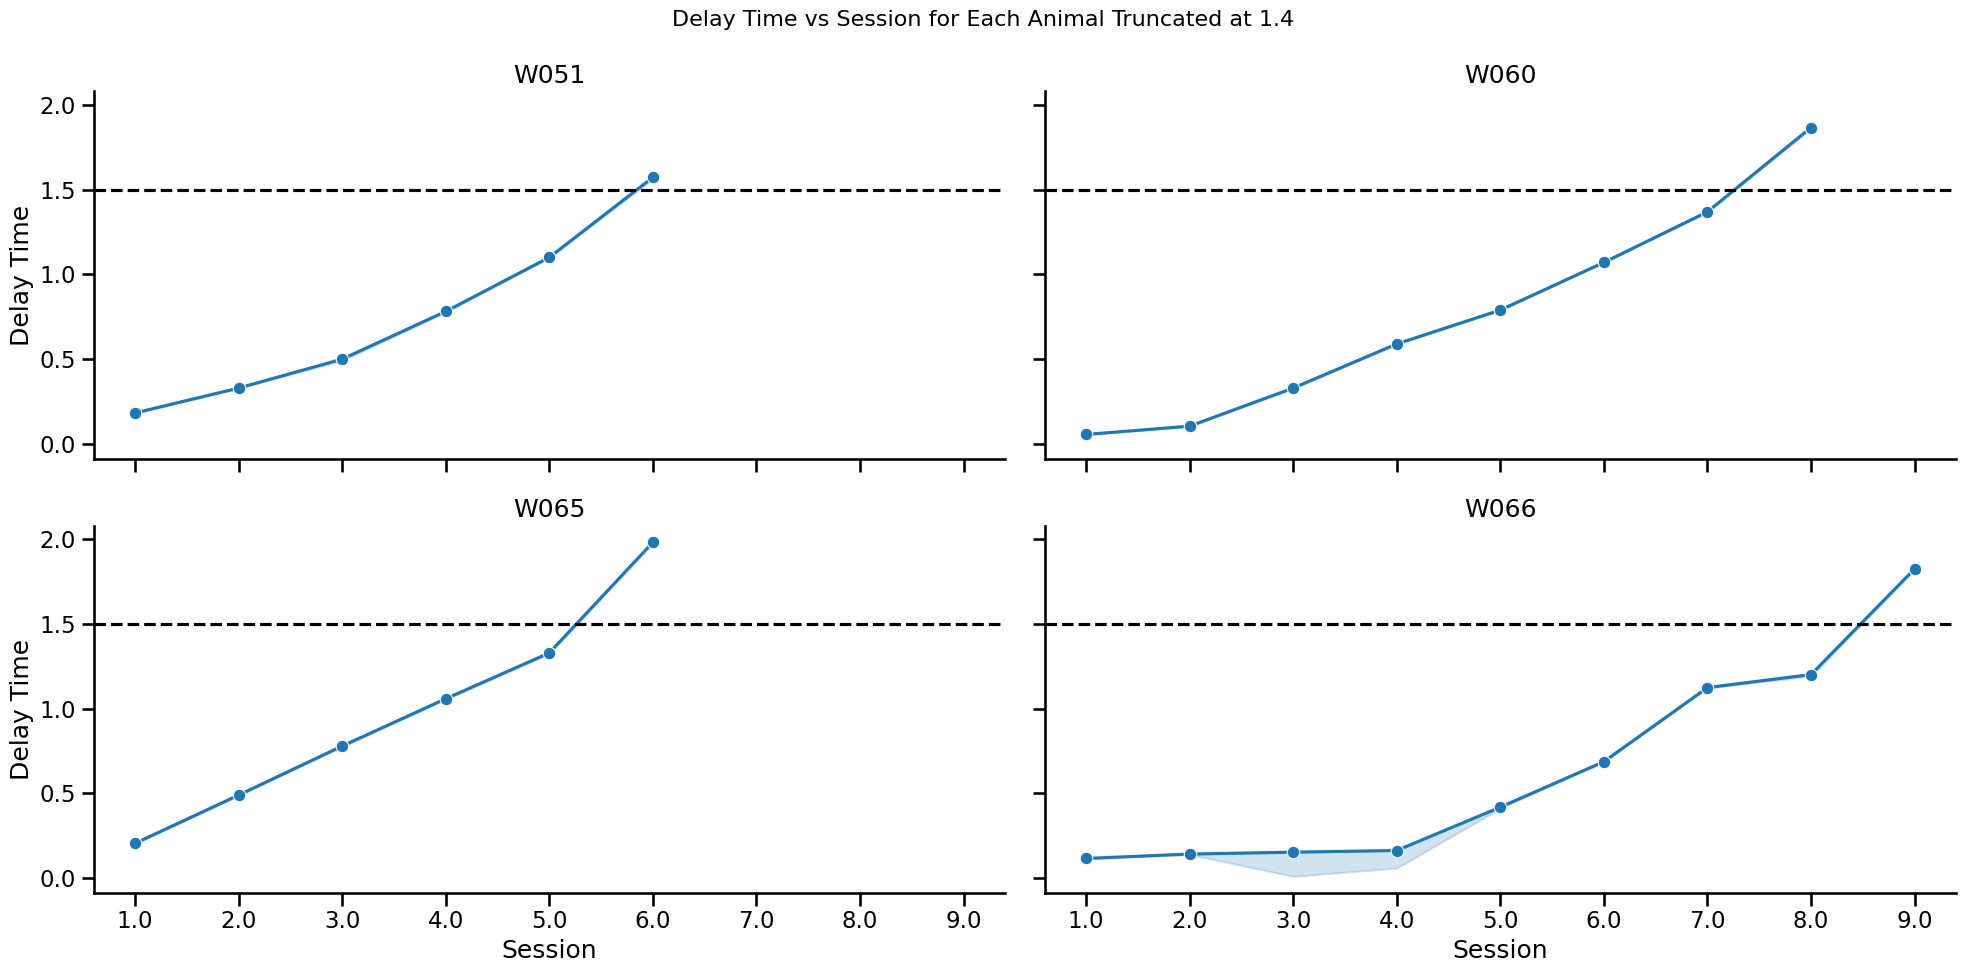

In [156]:
plot_animals = ["W051", "W060", "W065", "W066"]

# Create a FacetGrid with 2 columns
g = sns.FacetGrid(
    short_del_df.query("training_stage == 1 and animal_id in @plot_animals"),
    col="animal_id",
    col_wrap=2,
    height=5,
    aspect=2,
)

# Map the lineplot function to each subset of the data
g.map(sns.lineplot, "session", "delay_time", marker="o", estimator="max")

# Add titles and adjust layout if needed
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle(
    f"Delay Time vs Session for Each Animal Truncated at {threshold}", fontsize=16
)
g.set_axis_labels("Session", "Delay Time")

g.map(plt.axhline, y=1.5, color="k", linestyle="--")
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticks())

## Number of sessions to reach 1.4s

(2.5, 13.0)

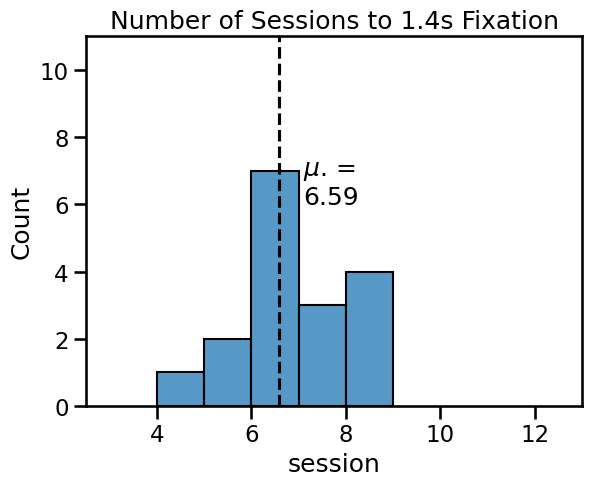

In [207]:
sess_to_gnp_thresh = short_del_df.groupby("animal_id").session.max().reset_index()
sns.histplot(data=sess_to_gnp_thresh, x="session", binwidth=1)

mean = sess_to_gnp_thresh.session.mean()
plt.axvline(mean, color="k", linestyle="--")
plt.text(x=mean + 0.5, y=6, s=f"$\mu$. = \n{mean:.2f}")
plt.title("Number of Sessions to 1.4s Fixation")
plt.ylim(0, 11)
plt.xlim(2.5, 13)

In [30]:
animals = sess_to_gnp_thresh.animal_id.nunique()
mean = sess_to_gnp_thresh.session.mean().round(2)
std = sess_to_gnp_thresh.session.std().round(2)
median = sess_to_gnp_thresh.session.median()

print(
    f"**Results** \nN animals = {animals}\n"
    f"Mean = {mean} +/- {std} std\n"
    f"Median = {median}"
)

**Results** 
N animals = 17
Mean = 6.59 +/- 1.46 std
Median = 6.0


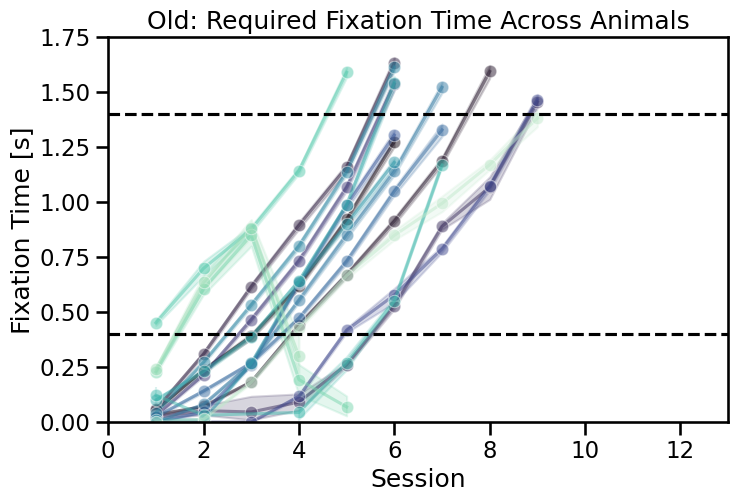

In [259]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(
    data=short_del_df,
    x="session",
    y="delay_time",
    hue="animal_id",
    marker="o",
    palette=sns.color_palette("mako", n_colors=short_del_df.animal_id.nunique()),
    ax=ax,
    alpha=0.5,
)

ax.axhline(y=0.4, color="k", linestyle="--")
ax.axhline(y=1.4, color="k", linestyle="--")
ax.legend()
_ = ax.set(
    xlabel="Session",
    ylabel="Fixation Time [s]",
    title="Old: Required Fixation Time Across Animals",
    ylim=(0, 1.75),
    xlim=(0, 13),
)
ax.get_legend().remove()

## Delta Delays

Lets see how the delays change on average in these early stages.

In [35]:
short_del_df["delay_delta"] = short_del_df.groupby(
    ["animal_id", "session"]
).delay_time.diff()




[Text(0, 0.5, 'Percent'),
 Text(0.5, 0, '$\\Delta Delay (trial) [s]$'),
 Text(0.5, 1.0, 'Trial by Trial Delay Delta, Mean = 0.0023')]

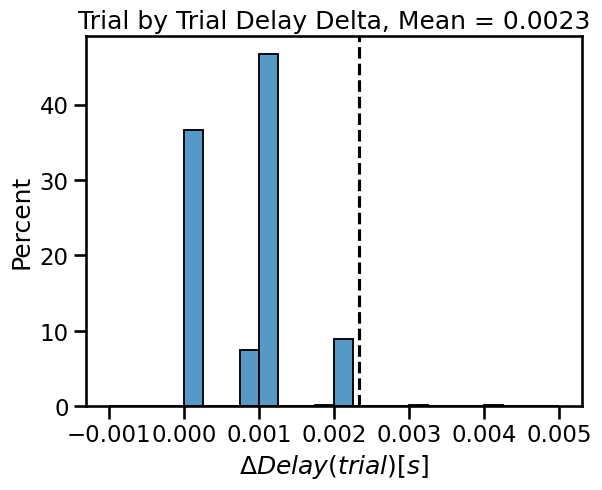

In [180]:
fig, ax = plt.subplots()
sns.histplot(
    x=short_del_df.delay_delta,
    binrange=(-0.001, 0.005),
    binwidth=0.00025,
    stat="percent",
    ax=ax,
)

mean = short_del_df.delay_delta.mean()
ax.axvline(short_del_df.delay_delta.mean(), ls="--", color="k")

ax.set(
    ylabel="Percent",
    xlabel="$\Delta Delay (trial) [s]$",
    title=f"Trial by Trial Delay Delta, Mean = {mean.round(4)}",
)

[Text(0, 0.5, 'Percent'),
 Text(0.5, 0, '$\\Delta Delay (trial) [s]$'),
 Text(0.5, 1.0, 'Trial by Trial Delay Delta, Mean = 0.0023')]

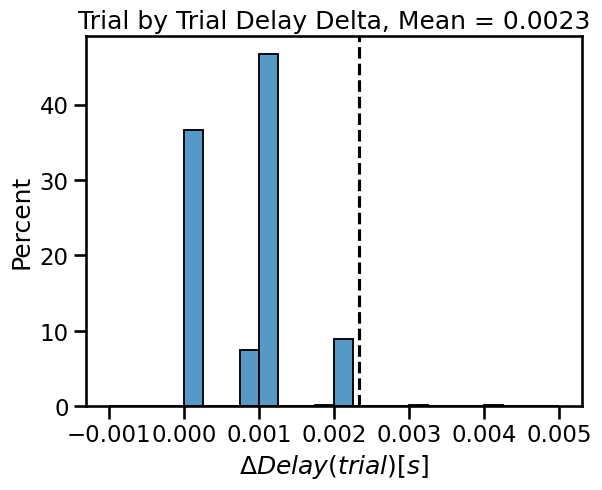

In [186]:
fig, ax = plt.subplots()
sns.histplot(
    x=short_del_df.delay_delta,
    binrange=(-0.001, 0.005),
    binwidth=0.00025,
    stat="percent",
    ax=ax,
)

mean = short_del_df.delay_delta.mean()
ax.axvline(short_del_df.delay_delta.mean(), ls="--", color="k")

ax.set(
    ylabel="Percent",
    xlabel="$\Delta Delay (trial) [s]$",
    title=f"Trial by Trial Delay Delta, Mean = {mean.round(4)}",
)

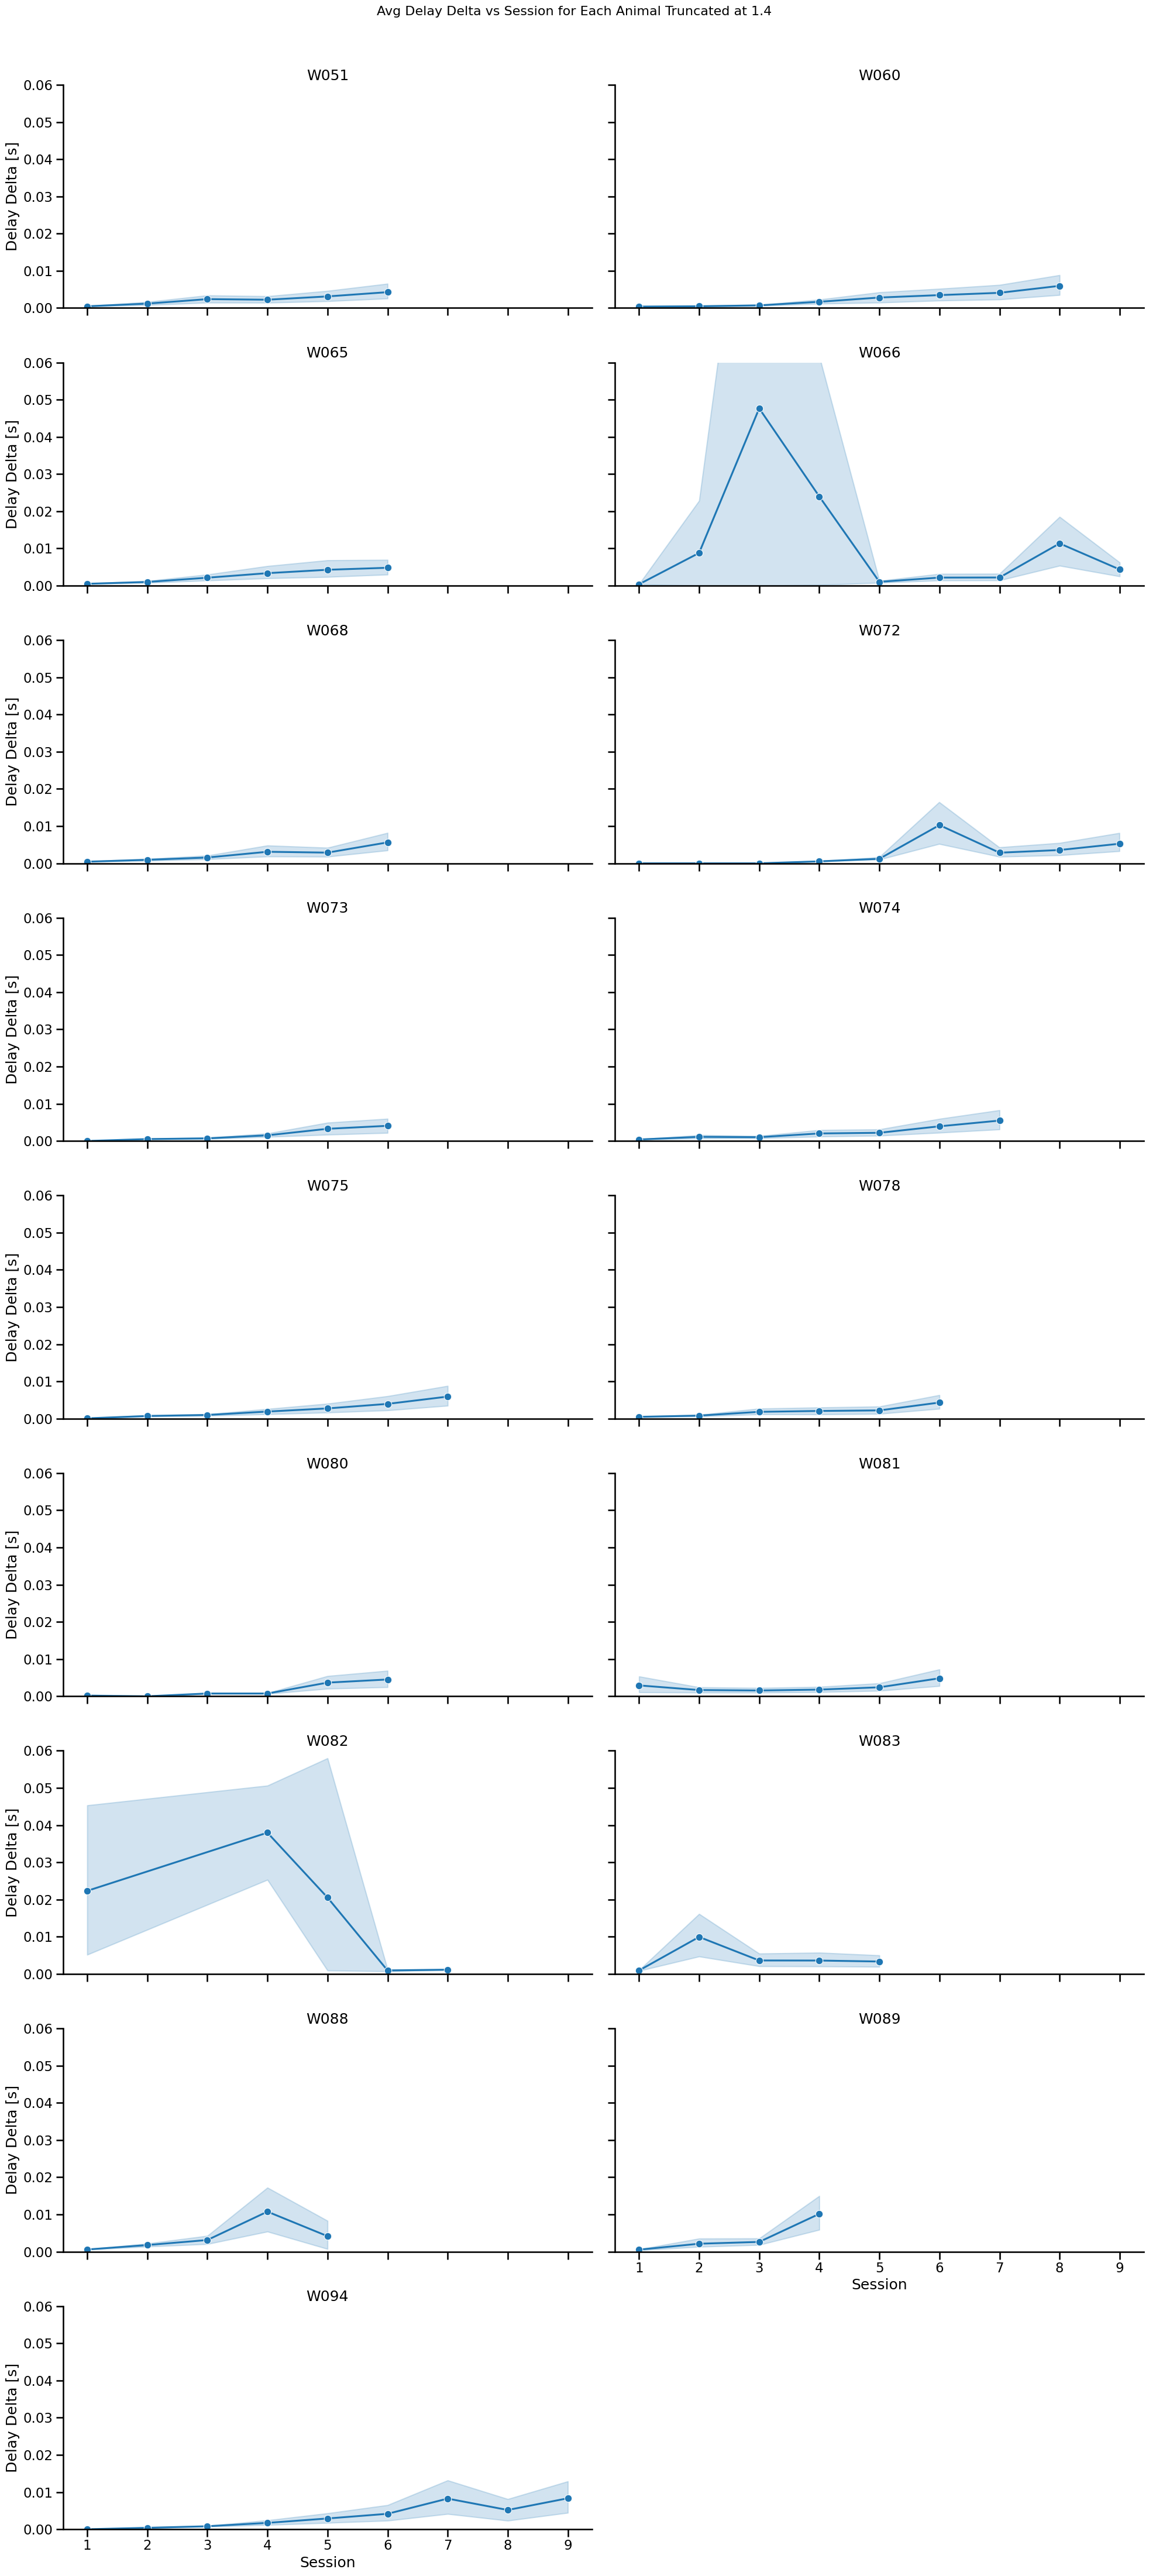

In [64]:
# avg_delay_delta = (
#     short_del_df.groupby(["animal_id", "session"]).delay_delta.mean().reset_index()
# )

g = sns.FacetGrid(
    short_del_df.query("delay_delta < 1"),
    col="animal_id",
    col_wrap=2,
    height=5,
    aspect=2,
    ylim=(None, 0.06),
)

# Map the lineplot function to each subset of the data
g.map(sns.lineplot, "session", "delay_delta", marker="o")

# Add titles and adjust layout if needed
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle(
    f"Avg Delay Delta vs Session for Each Animal Truncated at {threshold}", fontsize=16
)
g.set_axis_labels("Session", "Delay Delta [s]")

# for ax in g.axes.flatten():
#     ax.set_xticklabels(ax.get_xticks())

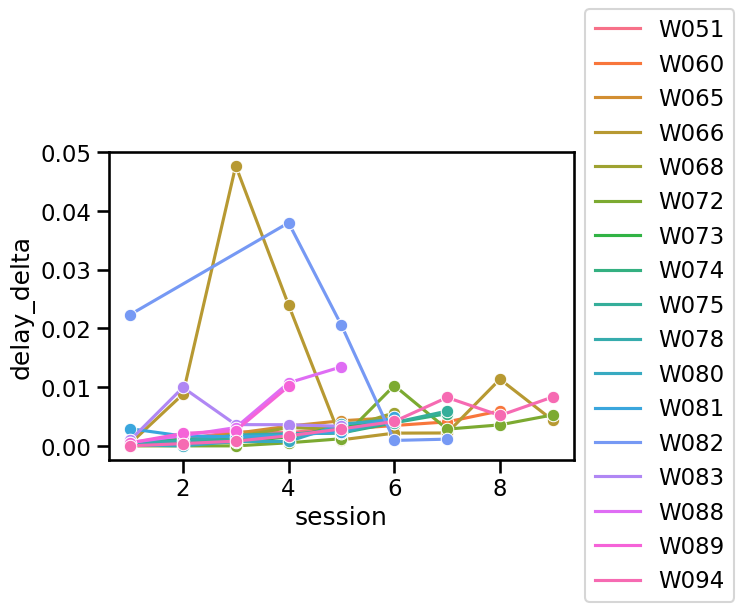

In [71]:
avg_delay_delta = (
    short_del_df.groupby(["animal_id", "session"]).delay_delta.mean().reset_index()
)
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(
    data=avg_delay_delta,
    x="session",
    y="delay_delta",
    marker="o",
    ax=ax,
    hue="animal_id",
)
ax.legend(bbox_to_anchor=(1, 1.5))

Lets exclude warm up trials and random trials that are longer than expected

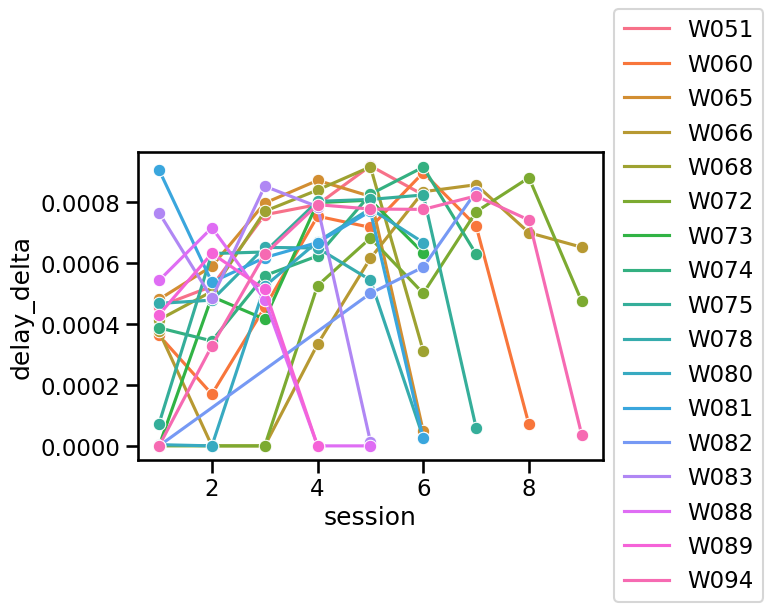

In [79]:
avg_delay_delta = (
    short_del_df.query("delay_delta < 0.002")
    .groupby(["animal_id", "session"])
    .delay_delta.mean()
    .reset_index()
)
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(
    data=avg_delay_delta,
    x="session",
    y="delay_delta",
    marker="o",
    ax=ax,
    hue="animal_id",
)
ax.legend(bbox_to_anchor=(1, 1.5))

<Axes: xlabel='session', ylabel='delay_delta'>

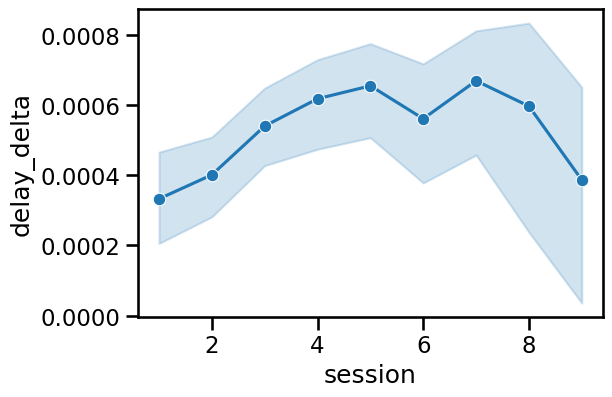

In [81]:
avg_delay_delta = (
    short_del_df.query("delay_delta < 0.002")
    .groupby(["animal_id", "session"])
    .delay_delta.mean()
    .reset_index()
)
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(
    data=avg_delay_delta,
    x="session",
    y="delay_delta",
    marker="o",
    ax=ax,
)

# Amount of growth per day
* make a column of session max delay over sessions
* do a rolling diff to get the diff by sessions


In [98]:
max_del_time = (
    short_del_df.groupby(["animal_id", "session"]).delay_time.max().reset_index()
)

max_del_time["session_growth"] = max_del_time.groupby("animal_id").delay_time.diff()

(-1.2, 1.2)

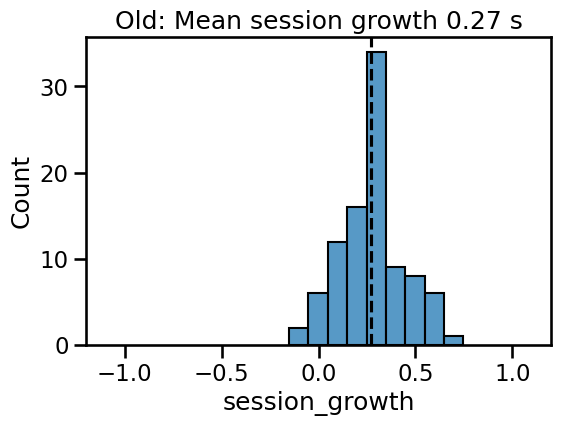

In [249]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=max_del_time, x="session_growth", binwidth=0.1)
mean = max_del_time.session_growth.mean()
ax.axvline(mean, ls="--", color="k")
ax.set(title=f"Old: Mean session growth {mean.round(2)} s")

plt.xlim(-1.2, 1.2)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_55878/2125287919.py:16: UserWarning: 
The palette list has fewer values (1) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


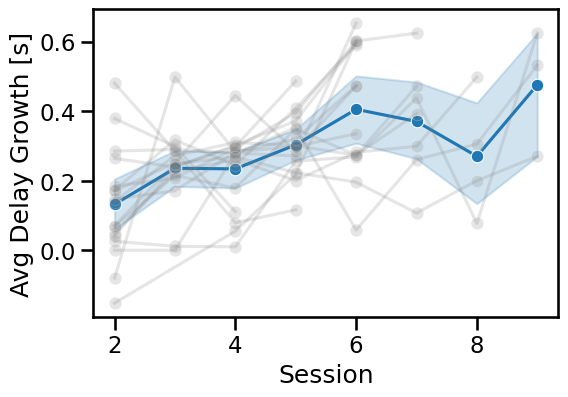

In [120]:
# avg_delay_delta = (
#     max_del_time
#     .groupby(["animal_id", "session"])
#     .delay_delta.mean()
#     .reset_index()
# )
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(
    data=max_del_time,
    x="session",
    y="session_growth",
    marker="o",
    ax=ax,
)

sns.lineplot(
    data=max_del_time,
    x="session",
    y="session_growth",
    marker="o",
    ax=ax,
    hue="animal_id",
    palette=["gray"],
    alpha=0.2,
    legend=False,
)
_ = ax.set(
    ylabel="Avg Delay Growth [s]",
    xlabel="Session",
)

# How many trials on average are these animals doing?

In [244]:
max_del_time.head()

animal_id  session  delay_time  session_growth  n_done_trials
0      W051        1      0.1820             NaN            372
1      W051        2      0.3290          0.1470            271
2      W051        3      0.5000          0.1710            206
3      W051        4      0.7817          0.2817            347
4      W051        5      1.1010          0.3193            351

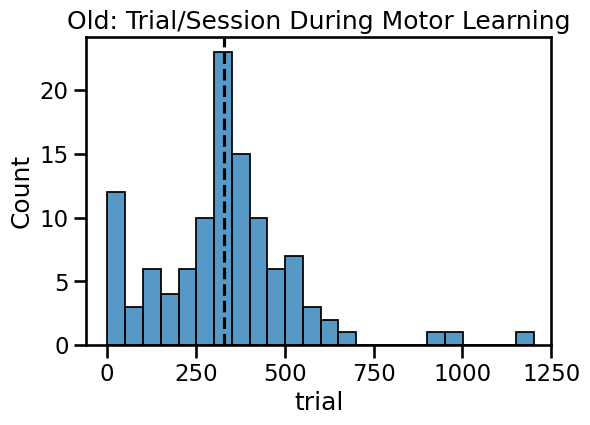

In [243]:
trial_rates_up_to_threshold = (
    short_del_df.groupby(["animal_id", "session"]).trial.max().reset_index()
)

plot_df = trial_rates_up_to_threshold
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=plot_df, x="trial", ax=ax, binwidth=50)

mean = plot_df.trial.mean()

ax.axvline(mean, color="k", linestyle="--")
_ = ax.set(
    title="Old: Trial/Session During Motor Learning",
    xlim=(None, 1250),
)

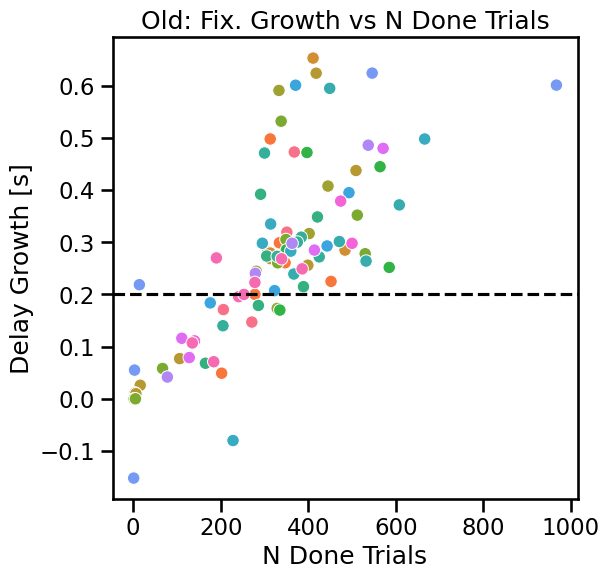

In [251]:
max_del_time["n_done_trials"] = max_trial_n.trial

fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    data=max_del_time,
    x="n_done_trials",
    y="session_growth",
    hue="animal_id",
    legend=False,
)

# ax.get_legend().remove()

_ = ax.set(
    xlabel="N Done Trials",
    ylabel="Delay Growth [s]",
    title="Old: Fix. Growth vs N Done Trials",
)

ax.axhline(0.2, ls="--", color="k")

This plot suggests that given the grown algorithm Athena was using, animals that did about 300 trials grew about 200 ms (0.2s) per session. This is helpful when comparing to the DMS protocol where trial numbers vary a bit more (since the pub wasn't being used).

#### Fun idea: linear regression to get the n done trials for 0.2

In [142]:
!pip install sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(max_del_time["n_done_trials"], max_del_time["session_growth"])
predictions = model.predict(X)
r_squared = model.score(X, y)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import statsmodels.api as sm
def univariate_linear_regression(df, x, y, print_results=True):
    """
    Performs univariate linear regression on given data.

    params
    -------
    df: pd.DataFrame
        Dataframe containing the data.
    x: str
        Name of the feature to be used as predictor.
    y: str
        Name of the feature to be used as target.

    Returns:
    - results (RegressionResults): Fitted regression model results.
    """

    X = df[x].values.reshape(-1, 1)
    y = df[y].values.reshape(-1, 1)
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    if print_results:
        print(results.summary())

    return results


def plot_univariate_linear_regression(results, ax=None, **kwargs):
    """
    Plots the linear regression model and data points.

    Parameters:
    - results (RegressionResults): Fitted regression model results.
    - ax (matplotlib axis, optional): Axis on which to plot.
    - kwargs (dict): Additional settings for plot axis.

    Returns:
    - ax (matplotlib axis): Axis containing the plot.
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    slope = results.params[1]
    intercept = results.params[0]

    # Get x and y data from the results
    x_data = results.model.exog[:, 1]
    y_data = results.model.endog

    # Determine the range for the line model
    x_line = np.linspace(min(x_data) * 0.5, max(x_data) * 1.5, 100)
    y_line = slope * x_line + intercept

    ax.scatter(x_data, y_data, color="black", label="Data")
    ax.plot(x_line, y_line, color="salmon", label="Regression Line")

    # Set axis limits, labels, title etc. based on kwargs
    ax.set(**kwargs)

    # Add text to upper right corner
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ax.text(xlim[1] * 0.75, ylim[1] * 0.75, f"$R^2$ = {results.rsquared_adj:.2f}")

    return ax

## Violation Rates

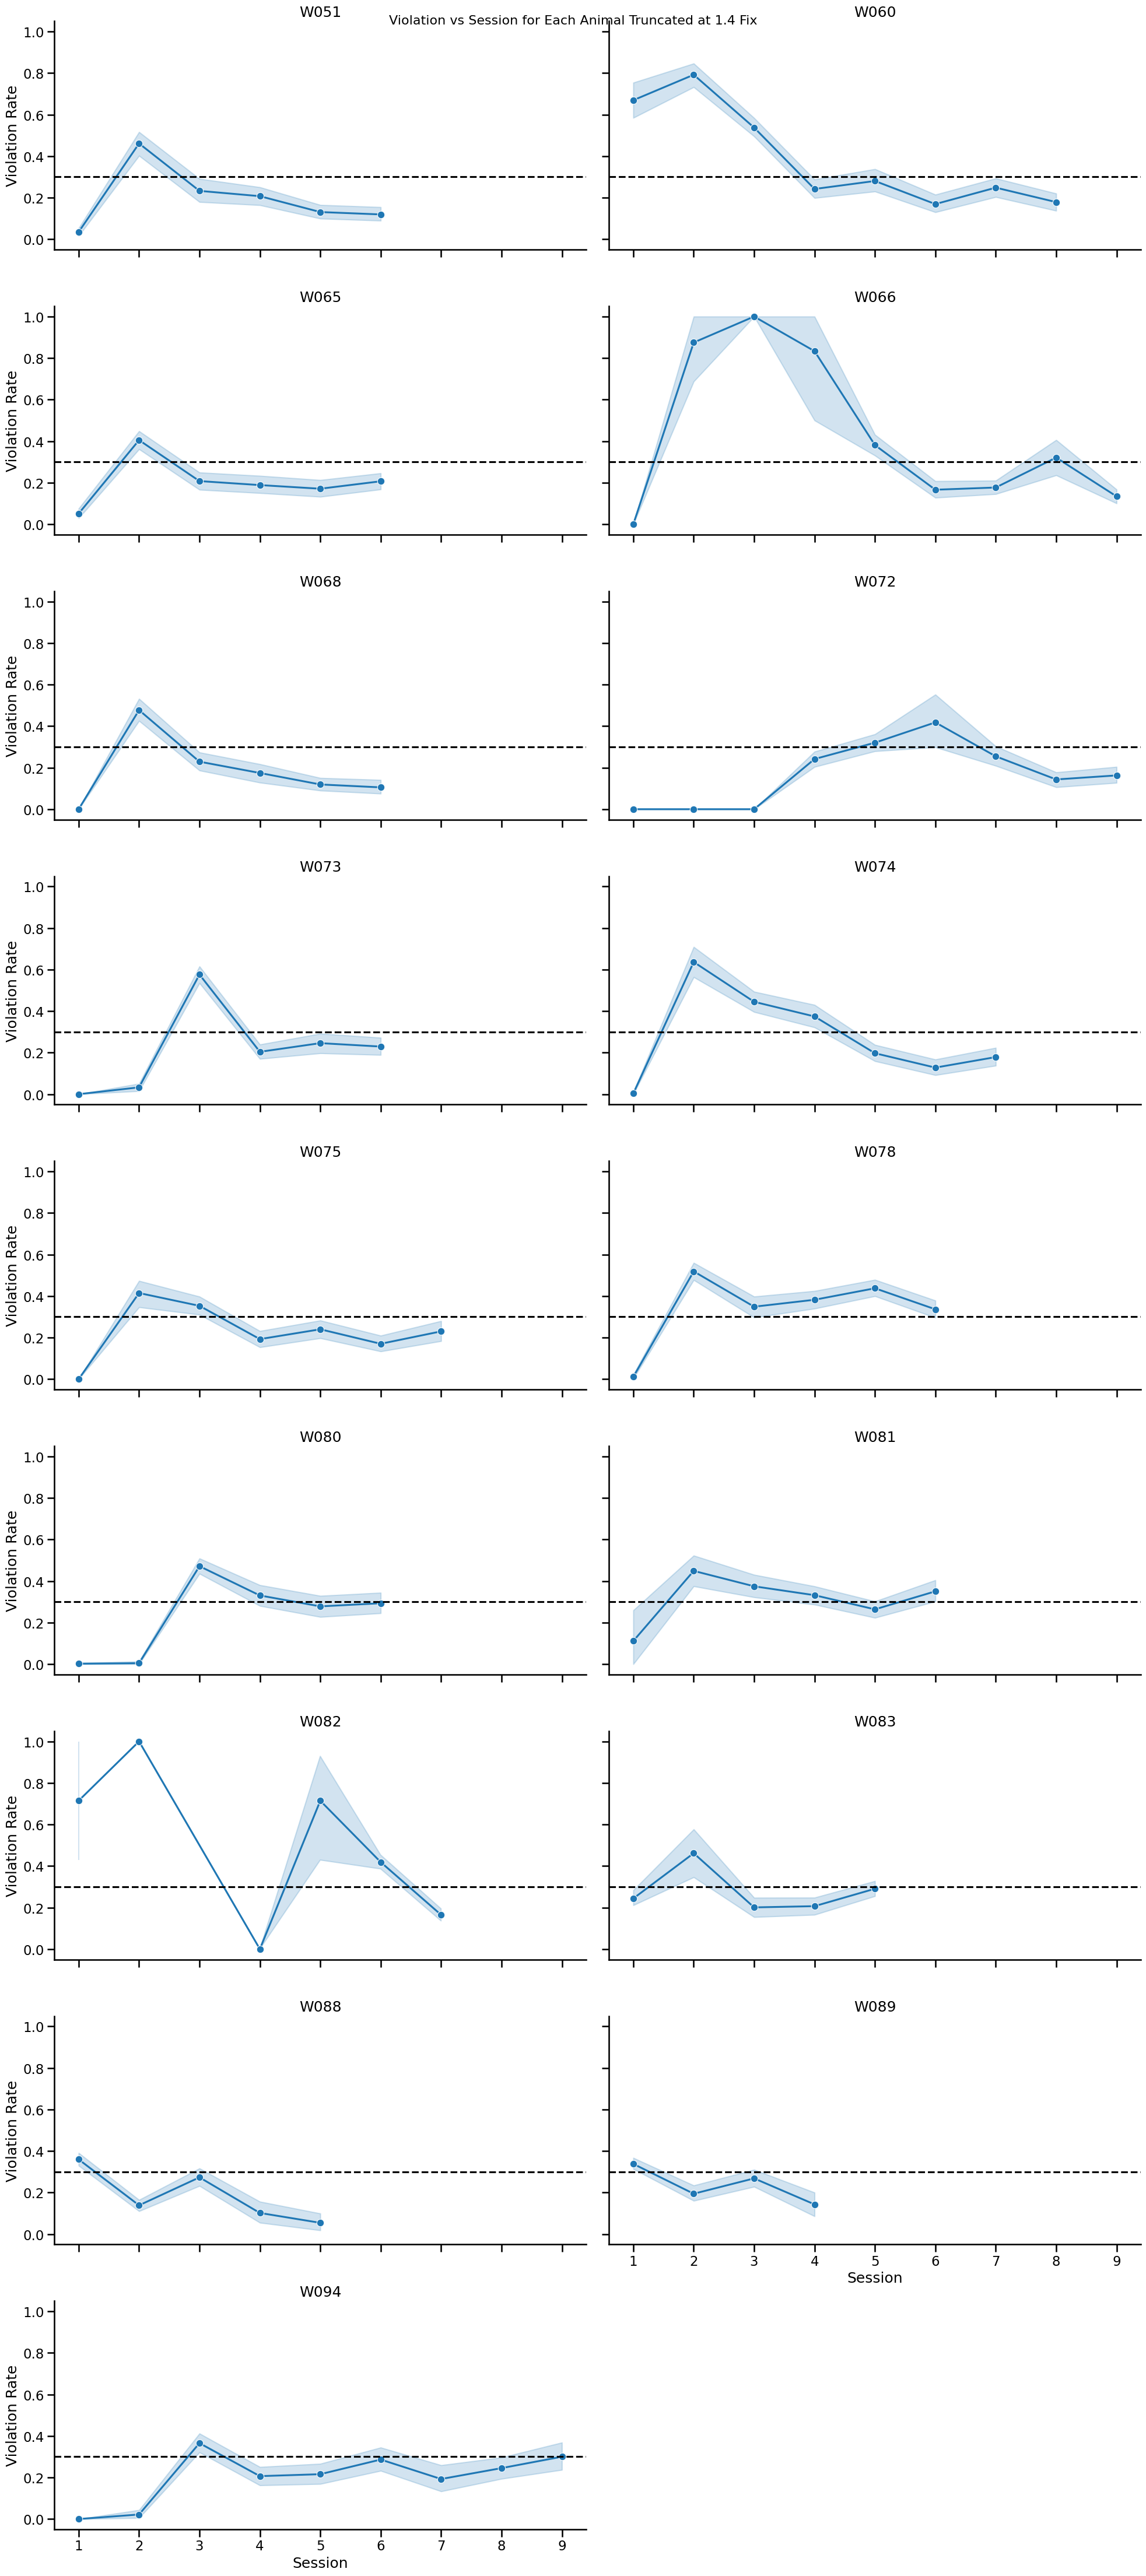

In [146]:
# Create a FacetGrid with 2 columns
g = sns.FacetGrid(
    short_del_df,
    col="animal_id",
    col_wrap=2,
    height=5,
    aspect=2,
)

# Map the lineplot function to each subset of the data
g.map(sns.lineplot, "session", "violation", marker="o", estimator="mean")

# Add titles and adjust layout if needed
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle(
    f"Violation vs Session for Each Animal Truncated at {threshold} Fix",
    fontsize=16,
)
g.set_axis_labels("Session", "Violation Rate")

g.map(plt.axhline, y=0.3, color="k", linestyle="--")

## Violation Rates

### Up to 1.4s Fixation

Text(0.5, 1.0, 'Old: Motor Mean Viol/Session 0.27')

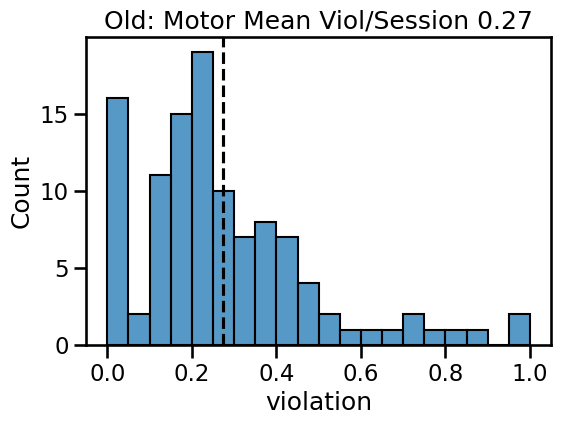

In [253]:
fig, ax = plt.subplots(figsize=(6, 4))
viol_rates_to_thresh = (
    short_del_df.groupby(["animal_id", "session"]).violation.mean().reset_index()
)

plot_df = viol_rates_to_thresh
sns.histplot(data=plot_df, x="violation", bins=20, binwidth=0.05, ax=ax)

mean = plot_df.violation.mean()
ax.axvline(mean, color="k", linestyle="--")
plt.title(f"Old: Motor Mean Viol/Session {mean:.2f}")

In [148]:
animals = plot_df.animal_id.nunique()
mean = plot_df.violation.mean().round(2)
std = plot_df.violation.std().round(2)
median = plot_df.violation.median().round(2)

print(
    f"**Results** \nN animals = {animals}\n"
    f"Mean = {mean} +/- {std} std\n"
    f"Median = {median}"
)

**Results** 
N animals = 17
Mean = 0.27 +/- 0.21 std
Median = 0.23


(0.0, 1.0)

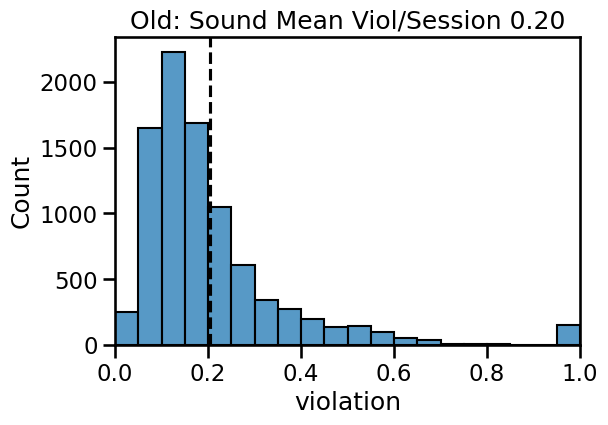

In [258]:
fig, ax = plt.subplots(figsize=(6, 4))
viol_rates_stg_4 = (
    df.query("training_stage >=4 and delay_time < 2.1")
    .groupby(["animal_id", "session"])
    .violation.mean()
    .reset_index()
)


plot_df = viol_rates_stg_4
sns.histplot(data=plot_df, x="violation", bins=20, binwidth=0.05, ax=ax)

mean = plot_df.violation.mean()
ax.axvline(mean, color="k", linestyle="--")
plt.title(f"Old: Sound Mean Viol/Session {mean:.2f}")
plt.xlim(0, 1)

In [150]:
print(
    f"**Results** \nN animals = {animals}\n"
    f"Mean = {mean.round(2)} +/- {std} std\n"
    f"Median = {median}"
)

**Results** 
N animals = 17
Mean = 0.22 +/- 0.21 std
Median = 0.23


Text(0.5, 1.0, 'Viol/Session Stage 4')

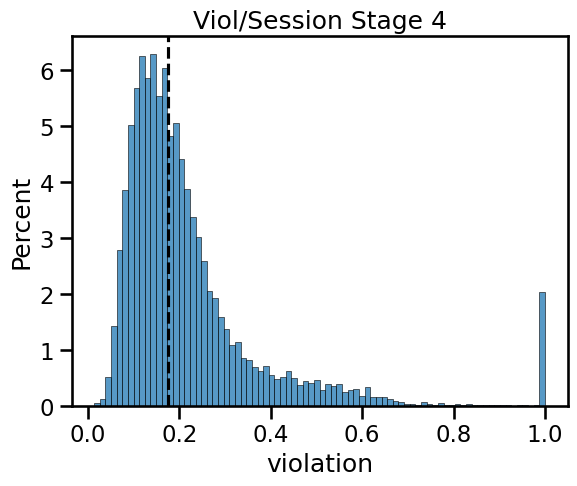

In [151]:
sns.histplot(data=plot_df, x="violation", stat="percent")

median = plot_df.violation.median()
plt.axvline(median, color="k", linestyle="--")
# plt.text(x=median + 0.1, y=15, s=f"med. = \n{median:.2f}")
plt.title("Viol/Session Stage 4")

### Relationship between 1.4 session avg fixation rate and stage 4 session avg fixation rate for each aniaml

In [152]:
compare_viol_df = pd.DataFrame()
compare_viol_df["animal_id"] = df.animal_id.unique()

compare_viol_df["early_viol_rates"] = compare_viol_df["animal_id"].map(
    short_del_df.groupby(["animal_id", "session"])
    .violation.mean()
    .reset_index()
    .groupby("animal_id")
    .violation.mean()
)

compare_viol_df["late_viol_rates"] = compare_viol_df["animal_id"].map(
    df.query("training_stage >=4")
    .groupby(["animal_id", "session"])
    .violation.mean()
    .reset_index()
    .groupby("animal_id")
    .violation.mean()
)

compare_viol_df.head()

animal_id  early_viol_rates  late_viol_rates
0      W051          0.197887         0.154241
1      W060          0.389829         0.140485
2      W065          0.205036         0.377705
3      W066          0.431885         0.268015
4      W068          0.184107         0.207301

(0.1, 0.6)

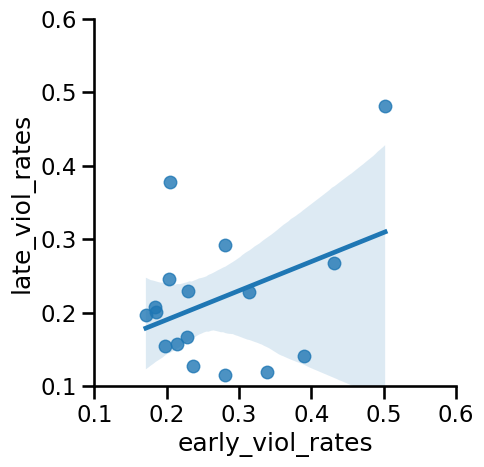

In [153]:
sns.lmplot(data=compare_viol_df, x="early_viol_rates", y="late_viol_rates")

plt.xlim(0.1, 0.6)
plt.ylim(0.1, 0.6)

(0.1, 0.6)

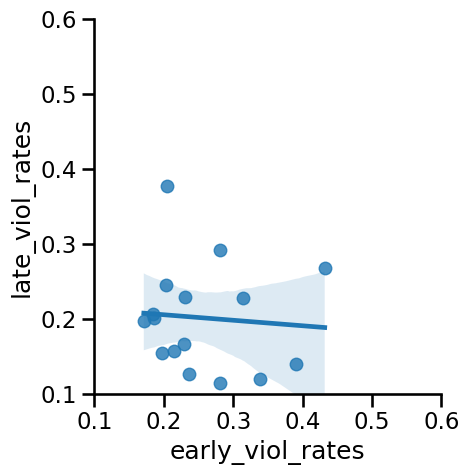

In [154]:
sns.lmplot(
    data=compare_viol_df.query("animal_id != 'W082'"),
    x="early_viol_rates",
    y="late_viol_rates",
)

plt.xlim(0.1, 0.6)
plt.ylim(0.1, 0.6)

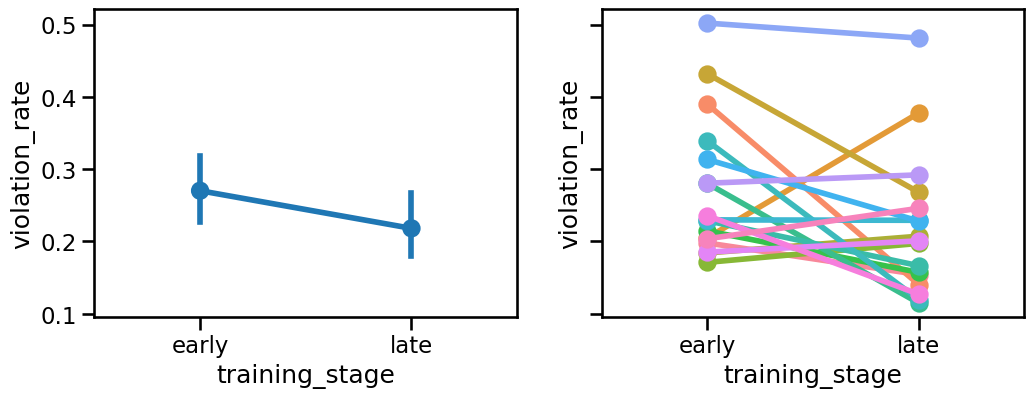

In [155]:
melted_df = compare_viol_df.melt(
    id_vars="animal_id",
    value_vars=["early_viol_rates", "late_viol_rates"],
    var_name="training_stage",
    value_name="violation_rate",
)

melted_df["training_stage"] = melted_df.training_stage.replace(
    {"early_viol_rates": "early", "late_viol_rates": "late"}
)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
sns.pointplot(data=melted_df, x="training_stage", y="violation_rate", ax=ax[0])
sns.pointplot(
    data=melted_df, x="training_stage", y="violation_rate", hue="animal_id", ax=ax[1]
)

# remove legend
ax[1].get_legend().remove()